In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create a dataset (two features and one output)
X, y = make_classification(n_samples=10, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, n_informative=2,
                           random_state=42)

In [2]:
X

array([[ 0.34881901, -1.80671372],
       [-0.36310016, -1.1075354 ],
       [ 1.40927009, -0.80772746],
       [ 1.63183215,  1.11812006],
       [-0.87712912,  2.71639998],
       [ 0.33041864,  2.03325186],
       [-0.16848726,  1.51164804],
       [ 1.94952901,  0.5087877 ],
       [ 1.20571936, -0.90263054],
       [ 0.49447882, -0.61772816]])

In [3]:
X

array([[ 0.34881901, -1.80671372],
       [-0.36310016, -1.1075354 ],
       [ 1.40927009, -0.80772746],
       [ 1.63183215,  1.11812006],
       [-0.87712912,  2.71639998],
       [ 0.33041864,  2.03325186],
       [-0.16848726,  1.51164804],
       [ 1.94952901,  0.5087877 ],
       [ 1.20571936, -0.90263054],
       [ 0.49447882, -0.61772816]])

In [4]:
y

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [5]:
# Convert labels to -1 and +1 for SVM
y = 2 * y - 1

In [6]:
y

array([-1, -1, -1,  1,  1,  1,  1,  1, -1, -1])

In [7]:
# Fit a Hard-Margin SVM (set C very large for hard margin)
svm = SVC(kernel='linear', C=1e6)  # Large C value forces hard margin
svm.fit(X, y)

,C,1000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Prediction for [[ 0 -1]]: -1


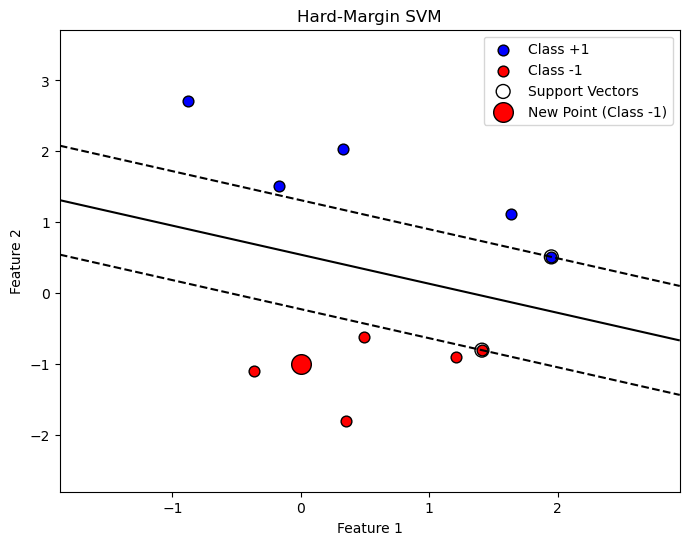

In [8]:
# Plot the decision boundary and support vectors
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1', s=60, edgecolors='black')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1', s=60, edgecolors='black')

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Compute the decision boundary values
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['black', 'black', 'black'], linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='black', label='Support Vectors')

new_point = np.array([[0, -1]])
predicted_label = svm.predict(new_point)
print(f"Prediction for {new_point}: {predicted_label[0]}")

# Plot the new point
color = 'blue' if predicted_label == 1 else 'red'
plt.scatter(new_point[:, 0], new_point[:, 1], c=color, s=200, edgecolors='black', label=f'New Point (Class {predicted_label[0]})')

# Labels and legend
plt.title('Hard-Margin SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

